In [11]:
import os

DATASET = "DATASET/lyrics"

if not os.path.exists(DATASET):
    print("Dataset not found")
    exit()

songs = []
files = os.listdir(DATASET)
for fn in files:
    with open(f"{DATASET}/{fn}", "r") as f:
        artist_name = fn.split(".")[0]
        song = f.read()
        songs.append((artist_name, song))


print("Total songs:", len(songs))
print("First song:", songs[0])

Total songs: 49
First song: ('lil-wayne', "I bought my first key from my baby momma brother\nI bought my first key\nBought my bought my first key\nI bought my first key from my baby momma brother\nI bought my first key\nBought my bought my first key\nYeah hustling on my city streets\nTrying to get a whole key i bought my frist key my first key\nInand we was getting em like for twenty five\nColombian connect homey we was getting fly\nWe on the grind and our nuts got bigga\nAnd every day we in the motherfucking hood our guns got bigga\nStunting on them niggas getting money staying fly every day a nigga spending\nRiding s and we blazing getting high nigga showing off his ride\nCrusing through the beach nigga rolling in them bimmers\nThem people pull me over hating cause they cant see us\nKnow I got the money laws wont leave me alone\nNow they acting funny cause they know a nigga strong\nMoney long and we coming\nI bought my first key from my baby momma brother\nI bought my first key\nBoug

In [12]:
# convert to sentence embeddings
from sentence_transformers import SentenceTransformer
import numpy as np

# Load pre-trained model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Encode lyrics
lyrics = np.array(model.encode([song[1] for song in songs]))

# Print the shape of the resulting vectors
print("Shape of the vectors:", lyrics.shape)

Shape of the vectors: (49, 384)


In [13]:
# pca to reduce dimensionality to 2d
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(lyrics)
lyrics_2d = pca.transform(lyrics)

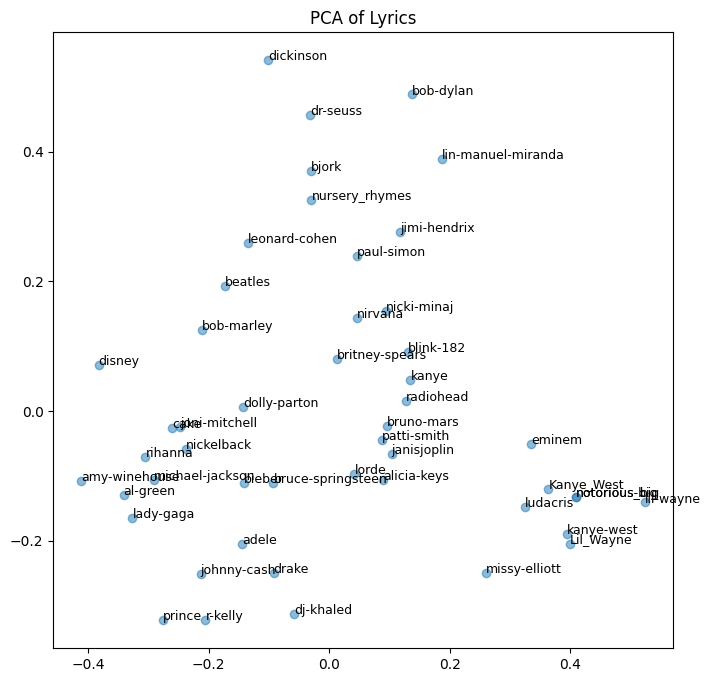

In [14]:
# plot the 2d vectors
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.scatter(lyrics_2d[:, 0], lyrics_2d[:, 1], alpha=0.5)
plt.title("PCA of Lyrics")
for i, (artist, _) in enumerate(songs):
    plt.text(lyrics_2d[i, 0], lyrics_2d[i, 1], artist, fontsize=9)
plt.show()


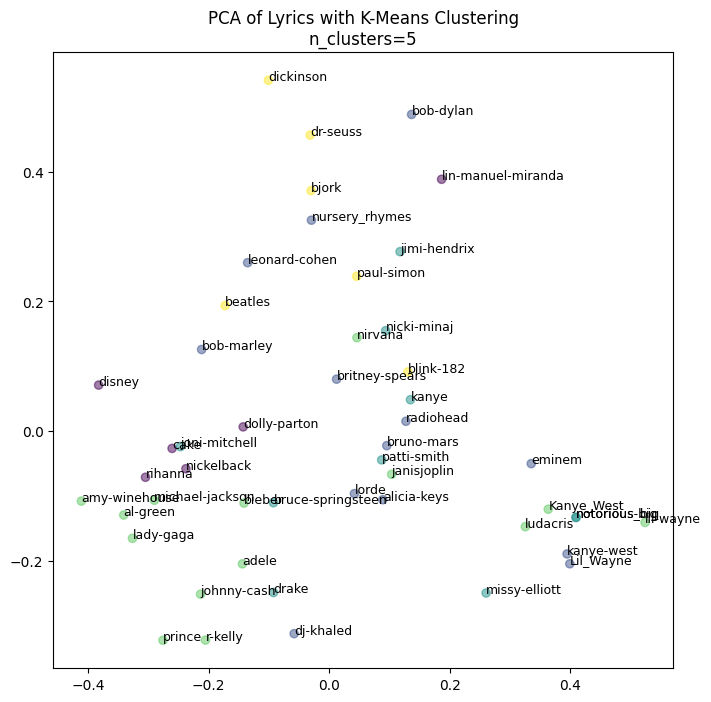

In [34]:
# k-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)
kmeans.fit(lyrics)
clusters = kmeans.predict(lyrics)

# plot the 2d vectors with clusters
plt.figure(figsize=(8, 8))
plt.scatter(lyrics_2d[:, 0], lyrics_2d[:, 1], c=clusters, alpha=0.5)
plt.title(f"PCA of Lyrics with K-Means Clustering\nn_clusters={5}")
for i, (artist, _) in enumerate(songs):
    plt.text(lyrics_2d[i, 0], lyrics_2d[i, 1], artist, fontsize=9)

# parameters
plt.show()

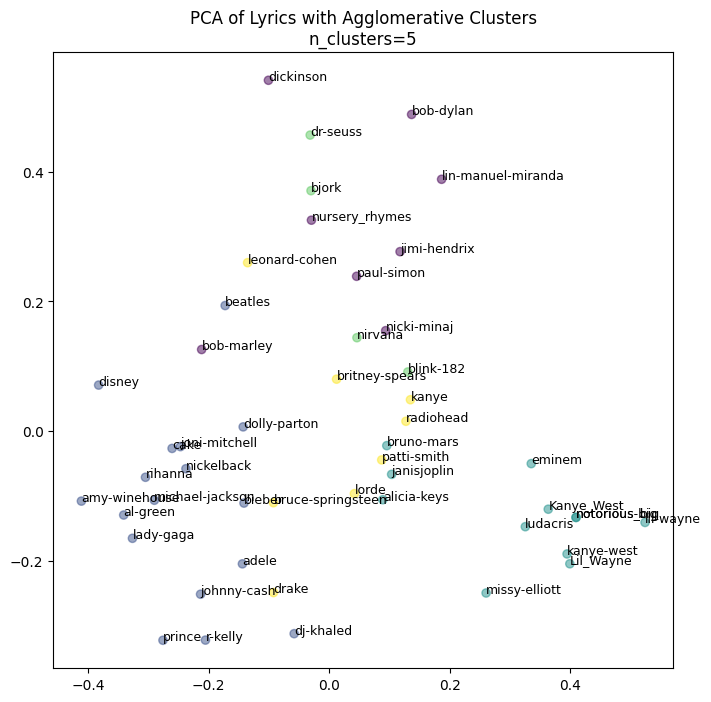

In [35]:
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=5)
agg.fit(lyrics)
clusters = agg.labels_

# plot the 2d vectors with clusters
plt.figure(figsize=(8, 8))
plt.scatter(lyrics_2d[:, 0], lyrics_2d[:, 1], c=clusters, alpha=0.5)
plt.title(f"PCA of Lyrics with Agglomerative Clusters\nn_clusters={5}")
for i, (artist, _) in enumerate(songs):
    plt.text(lyrics_2d[i, 0], lyrics_2d[i, 1], artist, fontsize=9)
plt.show()

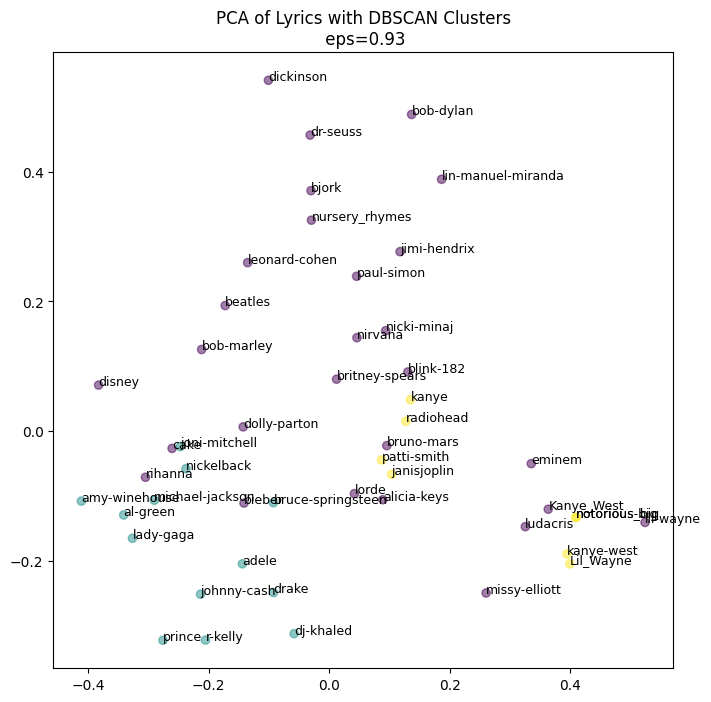

In [48]:
# DBSCAN
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.93)
dbscan.fit(lyrics)
clusters = dbscan.labels_

# plot the 2d vectors with clusters
plt.figure(figsize=(8, 8))
plt.scatter(lyrics_2d[:, 0], lyrics_2d[:, 1], c=clusters, alpha=0.5)
plt.title(f"PCA of Lyrics with DBSCAN Clusters\n eps=0.93")
for i, (artist, _) in enumerate(songs):
    plt.text(lyrics_2d[i, 0], lyrics_2d[i, 1], artist, fontsize=9)
plt.show()

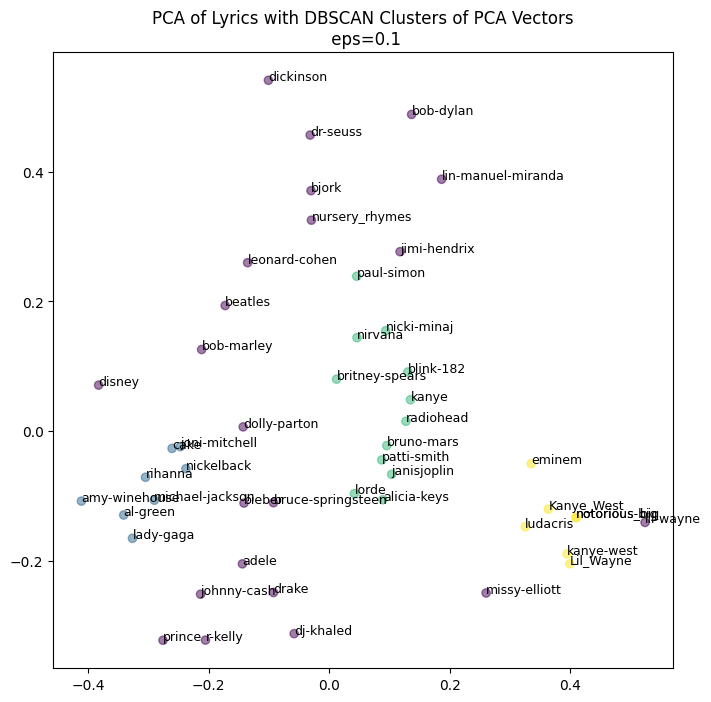

In [59]:
# DBCSCAN on PCA
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.1)
dbscan.fit(lyrics_2d)
clusters = dbscan.labels_

# plot the 2d vectors with clusters
plt.figure(figsize=(8, 8))
plt.scatter(lyrics_2d[:, 0], lyrics_2d[:, 1], c=clusters, alpha=0.5)
plt.title(f"PCA of Lyrics with DBSCAN Clusters of PCA Vectors\n eps=0.1")
for i, (artist, _) in enumerate(songs):
    plt.text(lyrics_2d[i, 0], lyrics_2d[i, 1], artist, fontsize=9)

plt.show()